In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
data = pd.read_csv('../data15/drinks.csv')
data.head()

,country,beer_servings,spirit_servings,wine_servings,total_litres_of_pure_alcohol,continent
0,Afghanistan,0,0,0,0.0,AS
1,Albania,89,132,54,4.9,EU
2,Algeria,25,0,14,0.7,AF
3,Andorra,245,138,312,12.4,EU
4,Angola,217,57,45,5.9,AF


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 193 entries, 0 to 192
Data columns (total 6 columns):
country                         193 non-null object
beer_servings                   193 non-null int64
spirit_servings                 193 non-null int64
wine_servings                   193 non-null int64
total_litres_of_pure_alcohol    193 non-null float64
continent                       170 non-null object
dtypes: float64(1), int64(3), object(2)
memory usage: 9.1+ KB


In [4]:
data.isnull().sum()

country                          0
beer_servings                    0
spirit_servings                  0
wine_servings                    0
total_litres_of_pure_alcohol     0
continent                       23
dtype: int64

In [5]:
data['continent']=data['continent'].fillna('OT')

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 193 entries, 0 to 192
Data columns (total 6 columns):
country                         193 non-null object
beer_servings                   193 non-null int64
spirit_servings                 193 non-null int64
wine_servings                   193 non-null int64
total_litres_of_pure_alcohol    193 non-null float64
continent                       193 non-null object
dtypes: float64(1), int64(3), object(2)
memory usage: 9.1+ KB


In [7]:
wine=data.groupby(by='continent').wine_servings.agg(['sum','mean','max','min'])
wine

,sum,mean,max,min
continent,,,,
AF,862,16.264151,233,0
AS,399,9.068182,123,0
EU,6400,142.222222,370,0
OC,570,35.625000,212,0
OT,564,24.521739,100,1
SA,749,62.416667,221,1


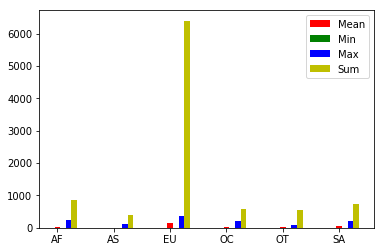

In [8]:
# 대륙별 wine의 평균, 최소, 최대, 합계를 시각화합니다.
n_groups = len(wine.index)
means = wine['mean'].tolist()
mins = wine['min'].tolist()
maxs = wine['max'].tolist()
sums = wine['sum'].tolist()
 
index = np.arange(n_groups) # x축 5개 생성 0,1,2,3,4,5
bar_width = 0.1
 
rects1 = plt.bar(index, means, bar_width,
                 color='r',
                 label='Mean')
 
rects2 = plt.bar(index + bar_width, mins, bar_width,
                 color='g',
                 label='Min')

rects3 = plt.bar(index + bar_width * 2, maxs, bar_width,
                 color='b',
                 label='Max')
 
rects3 = plt.bar(index + bar_width * 3, sums, bar_width,
                 color='y',
                 label='Sum')

plt.xticks(index, wine.index.tolist())
plt.legend()
plt.show()

# 나라별 전체 알코올 소비량 대비 맥주소비량

In [9]:
data.index = data['country']  #인덱스를 국가이름으로 변경
data=data.drop('country',axis=1)  #country 열 삭제
data

,beer_servings,spirit_servings,wine_servings,total_litres_of_pure_alcohol,continent
country,,,,,
Afghanistan,0,0,0,0.0,AS
Albania,89,132,54,4.9,EU
Algeria,25,0,14,0.7,AF
Andorra,245,138,312,12.4,EU
Angola,217,57,45,5.9,AF
Antigua & Barbuda,102,128,45,4.9,OT
Argentina,193,25,221,8.3,SA
Armenia,21,179,11,3.8,EU
Australia,261,72,212,10.4,OC


In [10]:
data['beer_rates'] = data['beer_servings']/(data['spirit_servings']+data['wine_servings'])
data['beer_rates']

country
Afghanistan                   NaN
Albania                  0.478495
Algeria                  1.785714
Andorra                  0.544444
Angola                   2.127451
Antigua & Barbuda        0.589595
Argentina                0.784553
Armenia                  0.110526
Australia                0.919014
Austria                  1.048872
Azerbaijan               0.411765
Bahamas                  0.537445
Bahrain                  0.600000
Bangladesh                    NaN
Barbados                 0.684211
Belarus                  0.342169
Belgium                  0.996622
Belize                   2.155738
Benin                    2.000000
Bhutan                        inf
Bolivia                  3.408163
Bosnia-Herzegovina       0.419890
Botswana                 2.471429
Brazil                   1.521739
Brunei                  10.333333
Bulgaria                 0.667630
Burkina Faso             1.785714
Burundi                       inf
Cote d'Ivoire            4.625000
Cabo V

# 전체 평균보다 많은 와인을 마시는 나라

In [11]:
data['wine_servings'].mean()

49.45077720207254

In [12]:
data[data['wine_servings']>data['wine_servings'].mean()].index.tolist

<bound method IndexOpsMixin.tolist of Index(['Albania', 'Andorra', 'Argentina', 'Australia', 'Austria', 'Bahamas',
       'Belgium', 'Bulgaria', 'Canada', 'Chile', 'Cook Islands', 'Croatia',
       'Cyprus', 'Czech Republic', 'Denmark', 'Equatorial Guinea', 'Estonia',
       'Finland', 'France', 'Gabon', 'Georgia', 'Germany', 'Greece', 'Hungary',
       'Iceland', 'Ireland', 'Italy', 'Laos', 'Latvia', 'Lithuania',
       'Luxembourg', 'Malta', 'Montenegro', 'Netherlands', 'New Zealand',
       'Norway', 'Paraguay', 'Poland', 'Portugal', 'Romania',
       'Russian Federation', 'St. Lucia', 'Sao Tome & Principe', 'Serbia',
       'Seychelles', 'Slovakia', 'Slovenia', 'South Africa', 'Spain', 'Sweden',
       'Switzerland', 'Macedonia', 'United Kingdom', 'USA', 'Uruguay'],
      dtype='object', name='country')>

# 전체 평균보다 많은 와인을 마시는 나라의 수

In [13]:
len(data[data['wine_servings']>data['wine_servings'].mean()].index)

55

# 전체 평균보다 많은 와인을 마시는 나라들의 평균

In [14]:
data[data['wine_servings']>data['wine_servings'].mean()]

,beer_servings,spirit_servings,wine_servings,total_litres_of_pure_alcohol,continent,beer_rates
country,,,,,,
Albania,89,132,54,4.9,EU,0.478495
Andorra,245,138,312,12.4,EU,0.544444
Argentina,193,25,221,8.3,SA,0.784553
Australia,261,72,212,10.4,OC,0.919014
Austria,279,75,191,9.7,EU,1.048872
Bahamas,122,176,51,6.3,OT,0.537445
Belgium,295,84,212,10.5,EU,0.996622
Bulgaria,231,252,94,10.3,EU,0.667630
Canada,240,122,100,8.2,OT,1.081081


In [15]:
data[data['wine_servings']>data['wine_servings'].mean()]['wine_servings'].mean()

154.27272727272728

# 전체 평균보다 많은 맥주를 마시는 국가의 수

In [32]:
data[data['beer_servings']>data['beer_servings'].mean()]

,beer_servings,spirit_servings,wine_servings,total_litres_of_pure_alcohol,continent,beer_rates
country,,,,,,
Andorra,245,138,312,12.4,EU,0.544444
Angola,217,57,45,5.9,AF,2.127451
Argentina,193,25,221,8.3,SA,0.784553
Australia,261,72,212,10.4,OC,0.919014
Austria,279,75,191,9.7,EU,1.048872
Bahamas,122,176,51,6.3,OT,0.537445
Barbados,143,173,36,6.3,OT,0.684211
Belarus,142,373,42,14.4,EU,0.342169
Belgium,295,84,212,10.5,EU,0.996622


In [33]:
len(data[data['beer_servings']>data['beer_servings'].mean()])

76

# 맥주 소비량 15위까지 프린트

In [21]:
beer=data.sort_values(by='beer_servings', ascending = False)
beer.head(15)

,beer_servings,spirit_servings,wine_servings,total_litres_of_pure_alcohol,continent,beer_rates
country,,,,,,
Namibia,376,3,1,6.8,AF,94.000000
Czech Republic,361,170,134,11.8,EU,1.187500
Gabon,347,98,59,8.9,AF,2.210191
Germany,346,117,175,11.3,EU,1.184932
Lithuania,343,244,56,12.9,EU,1.143333
Poland,343,215,56,10.9,EU,1.265683
Venezuela,333,100,3,7.7,SA,3.233010
Ireland,313,118,165,11.4,EU,1.106007
Palau,306,63,23,6.9,OC,3.558140


# 한국이 있는가? 몇위인가?

In [25]:
rank=list(range(1,len(beer)+1))
rank

[1,
 2,
 3,
 4,
 5,
 6,
 7,
 8,
 9,
 10,
 11,
 12,
 13,
 14,
 15,
 16,
 17,
 18,
 19,
 20,
 21,
 22,
 23,
 24,
 25,
 26,
 27,
 28,
 29,
 30,
 31,
 32,
 33,
 34,
 35,
 36,
 37,
 38,
 39,
 40,
 41,
 42,
 43,
 44,
 45,
 46,
 47,
 48,
 49,
 50,
 51,
 52,
 53,
 54,
 55,
 56,
 57,
 58,
 59,
 60,
 61,
 62,
 63,
 64,
 65,
 66,
 67,
 68,
 69,
 70,
 71,
 72,
 73,
 74,
 75,
 76,
 77,
 78,
 79,
 80,
 81,
 82,
 83,
 84,
 85,
 86,
 87,
 88,
 89,
 90,
 91,
 92,
 93,
 94,
 95,
 96,
 97,
 98,
 99,
 100,
 101,
 102,
 103,
 104,
 105,
 106,
 107,
 108,
 109,
 110,
 111,
 112,
 113,
 114,
 115,
 116,
 117,
 118,
 119,
 120,
 121,
 122,
 123,
 124,
 125,
 126,
 127,
 128,
 129,
 130,
 131,
 132,
 133,
 134,
 135,
 136,
 137,
 138,
 139,
 140,
 141,
 142,
 143,
 144,
 145,
 146,
 147,
 148,
 149,
 150,
 151,
 152,
 153,
 154,
 155,
 156,
 157,
 158,
 159,
 160,
 161,
 162,
 163,
 164,
 165,
 166,
 167,
 168,
 169,
 170,
 171,
 172,
 173,
 174,
 175,
 176,
 177,
 178,
 179,
 180,
 181,
 182,
 183,
 184,
 185

In [26]:
beer['beer_rank']=rank
beer

,beer_servings,spirit_servings,wine_servings,total_litres_of_pure_alcohol,continent,beer_rates,beer_rank
country,,,,,,,
Namibia,376,3,1,6.8,AF,94.000000,1
Czech Republic,361,170,134,11.8,EU,1.187500,2
Gabon,347,98,59,8.9,AF,2.210191,3
Germany,346,117,175,11.3,EU,1.184932,4
Lithuania,343,244,56,12.9,EU,1.143333,5
Poland,343,215,56,10.9,EU,1.265683,6
Venezuela,333,100,3,7.7,SA,3.233010,7
Ireland,313,118,165,11.4,EU,1.106007,8
Palau,306,63,23,6.9,OC,3.558140,9


In [29]:
beer[beer.index == 'South Korea']['beer_rank']

country
South Korea    66
Name: beer_rank, dtype: int64